# Optical flow random image denoising

In [1]:
local_debug = True

In [2]:
import logging
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
#from ipywidgets import *
import cv2
import time
#import kernels
from skimage import io as skimage_io

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
if local_debug:
    !ln -sf ../../information_theory/src/information_theory/ .
else:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
import information_theory  # pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"

In [5]:
import denoising.image.OF_random as denoising

In [6]:
GT = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/barb.png")

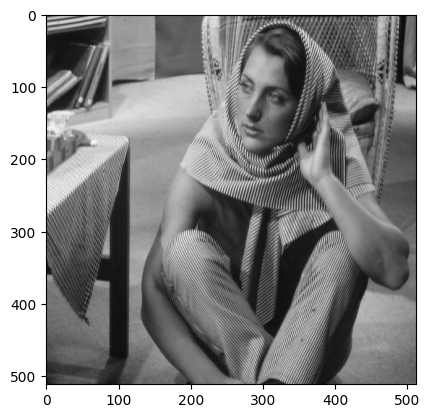

In [7]:
plt.imshow(GT, cmap="gray")

In [8]:
padded_GT = np.zeros(shape=(GT.shape[0]+32, GT.shape[1]+32), dtype=np.uint8)
padded_GT[16:-16, 16:-16] = GT
GT = padded_GT

In [9]:
mean = 0
var = 1000
sigma = 20 #var**0.5
noise = np.random.normal(mean, sigma, GT.shape).reshape(GT.shape)
noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

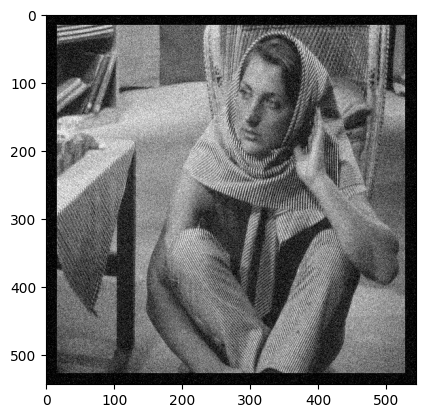

In [10]:
plt.imshow(noisy, cmap="gray")

In [11]:
logger.setLevel(logging.INFO)
denoiser = denoising.Monochrome_Denoiser(
    logger,
    pyramid_levels=3,
    window_side = 15,
    N_poly = 3,
    num_iterations = 3
)

[OF_random.py:51 __init__()] logger: <Logger __main__ (INFO)>
[OF_random.py:51 __init__()] estimator: <motion_estimation._2D.farneback_OpenCV.Estimator_in_CPU object at 0x7f0f8cce0df0>
[OF_random.py:51 __init__()] pyramid_levels: 3
[OF_random.py:51 __init__()] window_side: 15
[OF_random.py:51 __init__()] N_poly: 3
[OF_random.py:51 __init__()] num_iterations: 3
[OF_random.py:51 __init__()] flags: 0


In [12]:
denoised_img, _ = denoiser.filter(noisy, GT, N_iters=20, RS_sigma=0.75)
#denoised_img, _ = denoiser.filter(noisy, GT, N_iters=80, RS_sigma=5.5)

[OF_random.py:146 filter()] N_iters=20 RS_mean=0.0 RS_sigma=0.75
[OF_random.py:156 filter()] Iteration 0/20
[OF_random.py:85 randomize()] np.average(np.abs(displacements_x))=0.18878406141868512 np.average(np.abs(displacements_y))=0.1900816392733564
[OF_random.py:86 randomize()] np.max(displacements_x)=3 np.max(displacements_y)=3
[OF_random.py:87 randomize()] np.min(displacements_x)=-3 np.min(displacements_y)=-3
[OF_random.py:62 project_A_to_B()] np.average(np.abs(flow))=0.15086998045444489
/shared/repos/denoising/src/denoising/image/OF_random.py:126: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  quality, _ = stats.pearsonr(N.flatten(), P.flatten())
[OF_random.py:183 filter()] prev_QI=-1.0 current_QI=0.0
[OF_random.py:156 filter()] Iteration 1/20
[OF_random.py:85 randomize()] np.average(np.abs(displacements_x))=0.18921658737024222 np.average(np.abs(displacements_y))=0.18948353698096887
[OF_random.py:86 randomize()] np.max(displacements_x

In [13]:
denoised = np.clip(denoised_img, a_min=0, a_max=255)

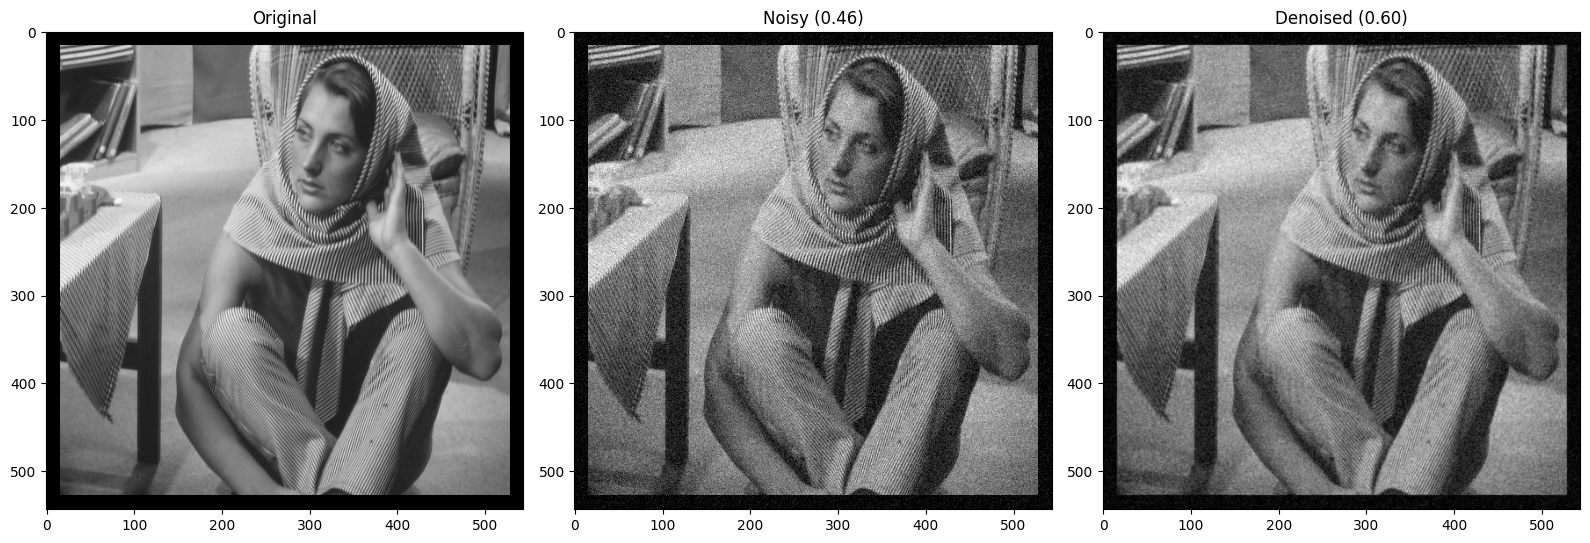

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(GT, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy, cmap="gray")
axs[1].set_title(f"Noisy ({information_theory.distortion.SSIM(noisy, GT):3.2f})")
axs[2].imshow(denoised, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.SSIM(denoised, GT):3.2f})")
fig.tight_layout()
plt.show()

In [ ]:
np.mean(GT)

In [ ]:
np.mean(denoised)